# 1. Set up

In [1]:
import os
import os.path as osp
import numpy as np
from IPython.display import display
from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import base64
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()

kaggle_cfg = {}
for name in ['enfit1_rsa', 'NGROK_TOKEN_1', 'ID_RSA_PUB', 'SSH_PASS']:
    try:
        kaggle_cfg[name] = user_secrets.get_secret(name)
    except:
        pass

enfit1_rsa_val = kaggle_cfg.get("enfit1_rsa", "")
if enfit1_rsa_val != "":
    enfit1_rsa_val = base64.b64decode(enfit1_rsa_val).decode('ascii')    
ngrok_token_val = kaggle_cfg.get("NGROK_TOKEN_1", "")
id_rsa_pub      = kaggle_cfg.get("ID_RSA_PUB", "")
ssh_pass_val    = kaggle_cfg.get("SSH_PASS", "12345")

# print(enfit1_rsa_val)
# print(ngrok_token_val)
# print(id_rsa_pub)
# print(ssh_pass_val)

In [3]:
![ ! -d "/kaggle/working/resyslab_utils" ] && git clone https://github.com/dntai/resyslab_utils.git /kaggle/working/resyslab_utils
![ -d "/kaggle/working/resyslab_utils" ] && cd /kaggle/working/resyslab_utils && git pull
%run /kaggle/working/resyslab_utils/resyslab_utils/clouds/cloud_setup.py

Already up to date.


In [4]:
start_ssh(id_rsa_pub=id_rsa_pub,
          install_ssh=True, 
          config_ssh=True, 
          password=ssh_pass_val)

********** SETUP SSH SERVICE **********
> Install ssh service...
> Copy public key to authorized keys...
> Config ssh service...
> Set root password...
> Restart SSH service...
 * Restarting OpenBSD Secure Shell server sshd
   ...done.

> Process ~/.bashrc to registry PS1, TERM...
PS1=
PS1='\[\e]0;\u@\h: \w\a\]\[\033\]\u@\h\[\033\]:\[\033\]\w\[\033\]$ '

---------- Finished ----------



In [5]:
start_ngrok([ngrok_token_val])

********** SETUP NGROK **********
> Install ngrok...
> Kill ngrok process...
/bin/bash: line 0: kill: `': not a pid or valid job spec
> Binding ports...
> Registry success!                                                                                 
ssh: NgrokTunnel: "tcp://0.tcp.ngrok.io:14369" -> "localhost:22"
vscode: NgrokTunnel: "https://bb0b-35-231-207-255.ngrok-free.app" -> "http://localhost:9000"

---------- Finished ----------



In [6]:
setup_config_github(enfit1_rsa_val, 'enfit1_rsa', 'math')

********** CONFIG GITHUB **********
> Add id_rsa...
> Add config file...
> List ~/.ssh...
authorized_keys  config  enfit1_rsa
> Show config...
Host math
    HostName ssh.github.com
    User git
    Port 443
    StrictHostKeyChecking no
    IdentityFile ~/.ssh/enfit1_rsa
> Test ssh...
PTY allocation request failed on channel 0
Hi duongngockhanh! You've successfully authenticated, but GitHub does not provide shell access.
Connection to ssh.github.com closed.


In [8]:
!pip install wandb

In [9]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
wandb_api = user_secrets.get_secret("wandb_api") 

In [10]:
import wandb
wandb.login(key=wandb_api)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# 2. Train

In [10]:
!git clone math:duongngockhanh/colorful-image-colorization.git

Cloning into 'colorful-image-colorization'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 150 (delta 54), reused 101 (delta 24), pack-reused 0
Receiving objects: 100% (150/150), 2.13 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [11]:
%cd colorful-image-colorization/
!git pull
%cd ..

/kaggle/working/colorful-image-colorization
Already up to date.
/kaggle/working


In [35]:
%reload_ext autoreload
%autoreload 2
%run /kaggle/working/colorful-image-colorization/train.py

train_in_path = "/kaggle/input/aio-coco-stuff/train2017/train2017"
val_in_path = "/kaggle/input/aio-coco-stuff/val2017/val2017"
main(train_in_path=train_in_path, val_in_path=val_in_path, weight="exp_eccv16/exp12.pt", use_wandb=False)

Load model from exp_eccv16/exp12.pt
Weights will be saved in exp_eccv16/exp16.pt
save weight ...
EPOCH 1:	Train loss: 69.7587	Val loss: 49.2252	Time: 3.28s
Complete training in 3.276196s


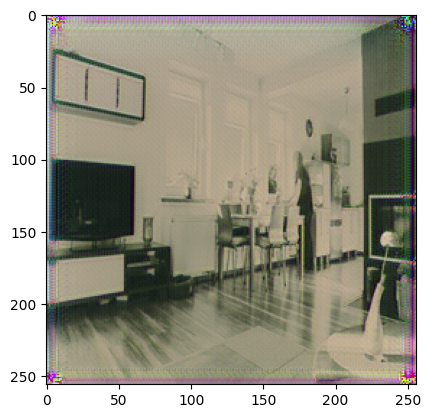

In [41]:
%reload_ext autoreload
%autoreload 2
%run /kaggle/working/colorful-image-colorization/inference.py

train_in_path = "/kaggle/input/aio-coco-stuff/train2017/train2017"
val_in_path = "/kaggle/input/aio-coco-stuff/val2017/val2017"
main(train_in_path=train_in_path, val_in_path=val_in_path, weight="exp_eccv16/exp12.pt")

In [13]:
!rm -rf wandb

In [52]:
!rm -rf exp_eccv16

In [36]:
!python --version

Python 3.10.13


# 3. Git update

In [42]:
%cd colorful-image-colorization/
!git add .
!git commit -m "fix bug: Modules are cached"
!git push
%cd ..

/kaggle/working/colorful-image-colorization
[main 6a23a13] fix bug: Modules are cached
 2 files changed, 8 insertions(+), 12 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 484 bytes | 484.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To math:duongngockhanh/colorful-image-colorization.git
   5716212..6a23a13  main -> main
/kaggle/working


In [20]:
!git config --global user.email "xxx@gmail.com"
!git config --global user.name "xxx"